/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

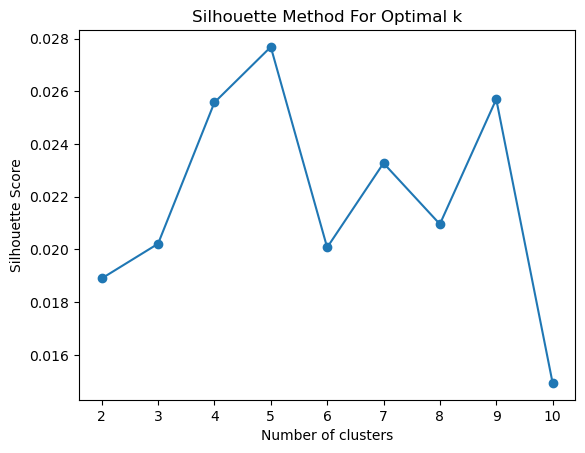

Optimal number of clusters: 5


In [530]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = '/home/kng/kng/CRAWLER/region_top_words.csv'
df = pd.read_csv(file_path)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['top_words'])

# 실루엣 점수를 저장할 빈 리스트 생성
silhouette_scores = []

# 2에서 10까지의 클러스터 수에 대해 K-means 클러스터링을 수행
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수를 시각화하여 최적의 클러스터 개수를 찾음
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 최적의 클러스터 개수 출력
optimal_k = np.argmax(silhouette_scores) + 2  # index가 0부터 시작하므로 +2
print(f'Optimal number of clusters: {optimal_k}')


/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


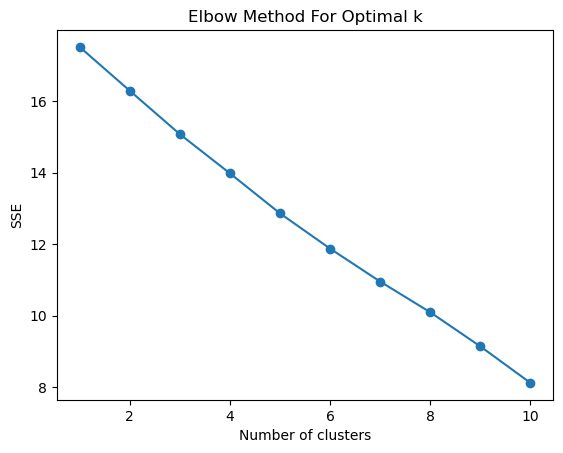

In [531]:
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ팔꿈치ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# CSV 파일 불러오기
file_path = '/home/kng/kng/CRAWLER/region_top_words.csv'
df = pd.read_csv(file_path)


# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['top_words'])

# SSE 계산을 위한 빈 리스트 생성
sse = []

# 1에서 10까지의 클러스터 수에 대해 K-means 클러스터링을 수행
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# SSE 값을 시각화하여 팔꿈치 점을 찾음
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   region  cluster
0      창원        0
1      진해        0
2      마산        2
3      진주        1
4      통영        4
5      사천        4
6      김해        1
7      밀양        1
8      거제        2
9      양산        3
10     의령        0
11     함안        3
12     창녕        0
13     고성        1
14     남해        2
15     하동        0
16     산청        3
17     함양        3
18     거창        0
19     합천        1
Cluster 0:
 벚꽃
 다리
 축제
 사진
 공원
 저수지
 장미
 체험
 남지
 유채꽃
Cluster 1:
 박물관
 공원
 아이
 테마
 파크
 체험
 사진
 터널
 영남루
 표충사
Cluster 2:
 카페
 바다
 마을
 매미
 거제도
 바람
 아이
 드라마
 로봇
 장수
Cluster 3:
 마을
 축제
 사찰
 계곡
 지리산
 공원
 체험
 와인
 하미
 개평
Cluster 4:
 케이블카
 바다
 디피랑
 벽화
 동피랑
 아이
 전망대
 도로
 글램핑
 정류장


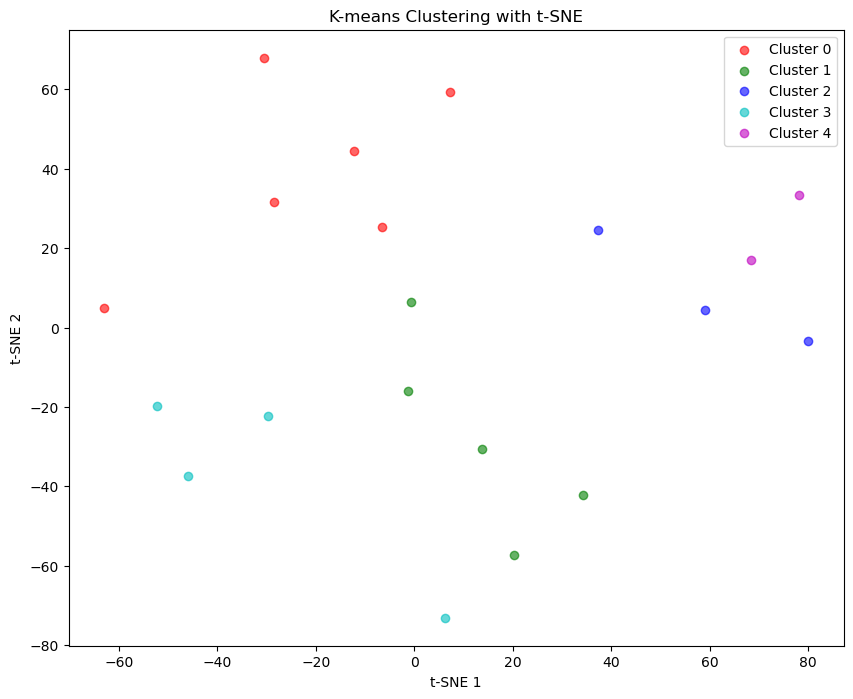

In [532]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = '/home/kng/kng/CRAWLER/region_top_words.csv'
df = pd.read_csv(file_path)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['top_words'])

# 클러스터 수 설정
num_clusters = 5 # 적절한 클러스터 수를 선택하세요.

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(X)

# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # perplexity 값을 조정합니다.
tsne_components = tsne.fit_transform(X.toarray())

# t-SNE 결과를 데이터 프레임에 추가
df['tsne1'] = tsne_components[:, 0]
df['tsne2'] = tsne_components[:, 1]

# 클러스터링 결과 확인
print(df[['region', 'cluster']])

# 각 클러스터의 대표 단어 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:  # 상위 10개 단어를 출력합니다.
        print(f' {terms[ind]}')

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

for i in range(num_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['tsne1'], cluster_data['tsne2'], label=f'Cluster {i}', c=colors[i], alpha=0.6)
    
plt.title('K-means Clustering with t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [533]:
df

,region,top_words,cluster,tsne1,tsne2
0,창원,"공원, 벚꽃, 장미, 저수지, 사진, 아이, 다리, 바다, 공간, 계곡",0,-6.675474,25.405844
1,진해,"벚꽃, 좌천, 경화역, 공원, 사진, 명소, 다리, 지엄, 군항제, 로망스",0,-28.533089,31.710958
2,마산,"바다, 드라마, 해양, 사진, 세트, 아이, 장수, 로봇, 다리, 카페",2,37.194469,24.639027
3,진주,"진주성, 박물관, 진양호, 아이, 촉석루, 남강, 유등, 사진, 전시관, 공원",1,34.242199,-42.069767
4,통영,"동피랑, 마을, 벽화, 공원, 카페, 바다, 사진, 아이, 케이블카, 디피랑",4,68.298019,16.991499
5,사천,"바다, 케이블카, 글램핑, 비토, 아이, 사진, 빌라, 정류장, 도로, 전망대",4,78.104706,33.433926
6,김해,"가야, 박물관, 아이, 체험, 공원, 국립, 수로왕릉, 사진, 대통령, 파크",1,13.752025,-30.706339
7,밀양,"체험, 아이, 사진, 공원, 영남루, 표충사, 테마, 풍경, 공간, 터널",1,-0.598959,6.319983
8,거제,"사진, 바다, 수국, 거제도, 매미, 바람, 아이, 마을, 카페, 체험",2,59.092964,4.384880
9,양산,"통도사, 매화, 사찰, 홍룡, 사진, 계곡, 축제, 카페, 마을, 폭포",3,-45.971218,-37.487000


In [534]:
gn = pd.read_csv('/home/kng/kng/CRAWLER/경상남도_주요관광지점 입장객 현황_20221231.csv')
gn

,시도,시군,관광지,내외국인 구분,2017년,2018년,2019년,2020년,2021년,2022년
0,경상남도,통합창원시,3.15아트,내국인,161327.0,159221.0,167720.0,52014.0,106167.0,145497.0
1,경상남도,통합창원시,3.15아트,외국인,0.0,170.0,23.0,0.0,5.0,1.0
2,경상남도,통합창원시,군항문화탐방,내국인,12108.0,12144.0,10518.0,372.0,0.0,2832.0
3,경상남도,통합창원시,도립미술관,내국인,119526.0,83897.0,91582.0,15524.0,35370.0,78689.0
4,경상남도,통합창원시,도립미술관,외국인,98.0,137.0,1895.0,86.0,73.0,30.0
...,...,...,...,...,...,...,...,...,...,...
395,경상남도,합천군,합천박물관,외국인,40.0,69.0,0.0,0.0,4.0,0.0
396,경상남도,합천군,합천영상테마파크,내국인,547168.0,409665.0,417043.0,178764.0,217690.0,237724.0
397,경상남도,합천군,합천영상테마파크,외국인,641.0,0.0,10.0,43.0,0.0,0.0
398,경상남도,합천군,황매산군립공원,내국인,529153.0,292401.0,799246.0,343543.0,541090.0,618855.0


/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kng/anaconda3/envs/kng/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from cur

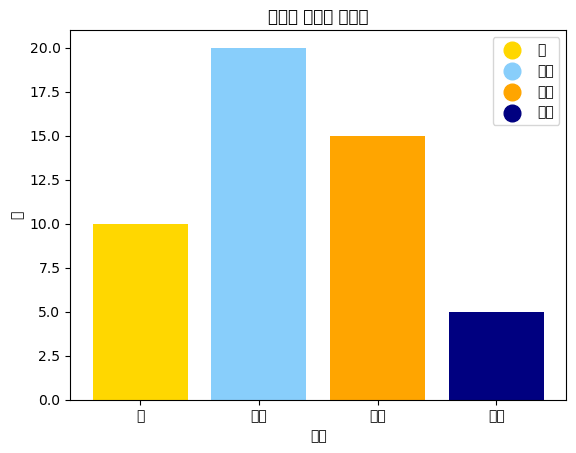

In [535]:
import matplotlib.pyplot as plt

# 예제 데이터
seasons = ['봄', '여름', '가을', '겨울']
values = [10, 20, 15, 5]

# 각 계절에 해당하는 색상 지정
colors = ['#FFD700', '#88CEFB', 'orange', 'navy']  # 어두운 노란색과 연한 파란색 사용

# 막대 그래프 그리기
bars = plt.bar(seasons, values, color=colors)

# 각 색상이 무엇을 나타내는지 점 모양의 범례 추가
for season, color in zip(seasons, colors):
    plt.scatter([], [], color=color, label=season)

plt.legend(loc='upper right', markerscale=2)

# 그래프 제목 및 레이블 추가
plt.title('계절별 데이터 시각화')
plt.xlabel('계절')
plt.ylabel('값')

# 그래프 표시
plt.show()
